In [17]:
using Plots
using Random
using Distributions
using Statistics
using LaTeXStrings

In [2]:
function Binomiali(N,p,nn) ### Numero de pruebas ##nn= numero de intentos
    options = [1, 0]
    probabilities = [p,1-p]  # Adjust the probabilities as needed
    
    # Create a random sample of indices using the probabilities
    sampled_indices = rand(Categorical(probabilities),nn,N)
    
    # Map the sampled indices to the options array
    dn = options[sampled_indices]
    
    n=zeros(nn,N)
    for i in 1:N
        n[:,i]=sum(dn[:,1:i],dims=2)
    end
    return n
end

Binomiali (generic function with 1 method)

# Modelo SIR Estocastico binomial

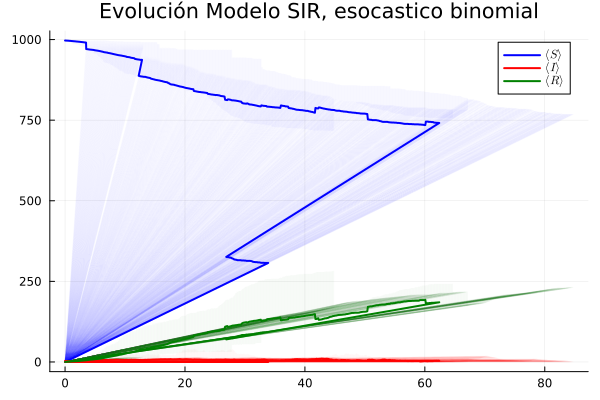

In [36]:
tf=100

S,I,R,ts,tps=SIReb(997,3,100,1/2,1/2,1000,100);
plot(ts,S,color="blue",label="",alpha=0.02, title="Evolución Modelo SIR, esocastico binomial")
plot!(ts,I,color="red",label="",alpha=0.02)
plot!(ts,R,color="green",label="",alpha=0.02)

mt=mean(ts,dims=1)
ms=mean(S,dims=1)
sds=std(S,dims=1)

mi=mean(I,dims=1)
sdi=std(I,dims=1)

mr=mean(R,dims=1)
sdr=std(R,dims=1)

### tiempo
mean(tps)
std(tps)
plot!(mt',ms', color="blue",label=L"\langle S \rangle",lw=2)
plot!(mt',mi', color="red",label=L"\langle I \rangle",lw=2)
plot!(mt',mr', color="green",label=L"\langle R \rangle",lw=2)
#plot!(mt',sds', label=L"\sigma(S)",lw=2)

In [41]:
mean(tps)

0.270833596

In [179]:

tf=100

S,I,R,ts,tps=SIReb(990,10,100,1/20,1/2,1000,100);
plot(ts,S,color="blue",label="",alpha=0.01)
plot!(ts,I,color="red",label="",alpha=0.01)
plot!(ts,R,color="green",label="",alpha=0.01)
mt=mean(ts,dims=1)
ms=mean(S,dims=1)
sds=std(S,dims=1)

mi=mean(I,dims=1)
sdi=std(I,dims=1)

mr=mean(R,dims=1)
sdr=std(R,dims=1)

### tiempo
mean(tps)
std(tps)


plot!(mt',ms', color="blue",label=L"\langle S \rangle",lw=2)
plot!(mt',mi', color="red",label=L"\langle I \rangle",lw=2)
plot!(mt',mr', color="green",label=L"\langle R \rangle",lw=2)
#plot!(mt',sds', label=L"\sigma(S)",lw=2)

In [202]:
S,I,R,ts,tps=SIReb(998,1,100,0.1,0.2,1000,100);
plot(ts,S,color="blue",label="",alpha=0.02)
plot!(ts,I,color="red",label="",alpha=0.02)
plot!(ts,R,color="green",label="",alpha=0.02)
mt=mean(ts,dims=1)
ms=mean(S,dims=1)
sds=std(S,dims=1)

mi=mean(I,dims=1)
sdi=std(I,dims=1)

mr=mean(R,dims=1)
sdr=std(R,dims=1)

### tiempo
mean(tps)
std(tps)
plot!(mt',ms', color="blue",label=L"\langle S \rangle",lw=2)
plot!(mt',mi', color="red",label=L"\langle I \rangle",lw=2)
plot!(mt',mr', color="green",label=L"\langle R \rangle",lw=2)
#plot!(mt',sds', label=L"\sigma(S)",lw=2)

# Modelo SIR Doob-Gillspie
$$S \rightarrow 1 P=\beta \frac{S I}{N}$$


In [232]:

function SIRGB1(S0,I0,tf,γ,β,NN)
        #SS=zeros(NN)
        #II=zeros(NN)
        #RR=zeros(NN)

    function PSIGP(S,I)
            N=S0+I0
            return (β*S*I/N)
        end
        
        function PIRGP(I)
            γ*I
        end
    
        infection_events = 0
        recovery_events = 0
        S=[S0]
        I=[I0]
        R=[0]
        ts=[0]
    
    for j in 1:NN
        i=0
        #for i in 1:3
        while ts[end]<=tf
            i+=1
            ### Escoger reaccion
            SI=PSIGP(S[i],I[i])
            IR=PIRGP(I[i])
            total=SI+IR
            ####Escoger tiempo
            r1,r2=rand(2)
            Δt=(1 / total).* log(1 / r1)
            ts=hcat(ts,ts[i]+Δt)
            
            if r2 < (SI / total)
                    # Infection event
                    S =hcat(S,S[i]-1)
                    I =hcat(I,I[i]+1)
                    R = hcat(R,R[i])
                    infection_events += 1
                else
                    # Recovery event
                    S =hcat(S,S[i])
                    I =hcat(I,I[i]-1) 
                    R = hcat(R,R[i]+1)
                    recovery_events += 1
            end
        end
    end
    return S,I,R,ts
end

SIRGB1 (generic function with 1 method)

In [246]:
A=Data()

LoadError: UndefVarError: Data not defined

In [241]:
S0=998
I0=1
tf=100
NN=1
 
β=0.2
γ=0.1

S1,I1,R1,ts1 = SIRGB1(S0,I0,tf,γ,β,NN)
plot(ts1',S1',label="Susceptibles",color="blue",lw=2,title="Evolución Modelo SIR, esocastico Doob-Gillspie")
plot!(ts1',I1',label="Infectados",color="red",lw=2)
plot!(ts1',R1',label="Recuperados",color="green",lw=2)

In [234]:
S1

1×3 Matrix{Int64}:
 998  998  998

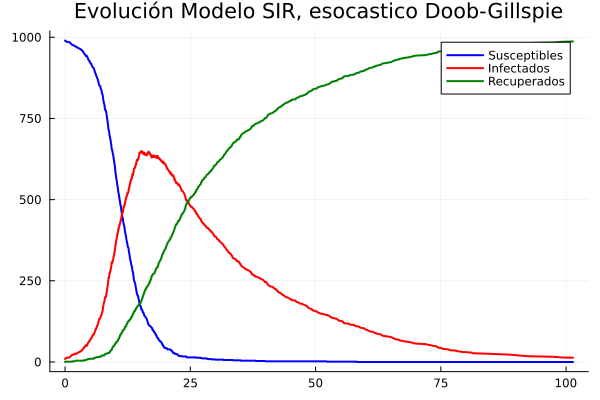

In [240]:
S0=990
I0=10
tf=100
NN=2
 
β=1/2
γ=1/20

S1,I1,R1,ts1=SIRGB1(S0,I0,tf,γ,β,NN)
plot(ts1',S1',label="Susceptibles",color="blue",lw=2,title="Evolución Modelo SIR, esocastico Doob-Gillspie")
plot!(ts1',I1',label="Infectados",color="red",lw=2)
plot!(ts1',R1',label="Recuperados",color="green",lw=2)

### Comparacion binomial vs DB

In [201]:
function SIReb(S0,I0,tf,γ,β,nn,NN)
    
    
    Δt=(tf)/nn
    ts=zeros(nn)
    Ts=zeros(NN,nn)
    tiempos=zeros(NN)
    #n=length(ts)
    ################
    SS=zeros(NN,nn)
    II=zeros(NN,nn)
    RR=zeros(NN,nn)
    S=zeros(nn);
    S[1]=S0
    I=zeros(nn);
    I[1]=I0
    N=S[1]+I[1]
    R=zeros(nn);
    
    function PSI(II,Δt)
         return (β*II*Δt/N)
    end
    function PIR(II,Δt)
        γ*Δt
    end
    
    
    
    for j in 1:NN
        i=1
        result = @timed begin
        while ts[i]<tf
            dt=Δt#rand(Exponential(1/i));
            ts[i+1]=ts[i]+dt
            if S[i]<=0
                SI=Binomiali(Int(1),PSI(I[i],dt),1)[end]
            else
                SI=Binomiali(Int(S[i]),PSI(I[i],dt),1)[end] 
            end
            S[i+1]=S[i]-SI
            IR=Binomiali(Int(I[i]),PIR(I[i],dt),1)[end]
    
            I[i+1]=I[i]+SI-IR
            #println(IR)
            #println(SI)
            R[i+1]=R[i]+IR
            i+=1
            if i==nn || I[i]==0 #ts[i+1]>=tf
                #println("Finalizado")
                break
            end
            end
        end
        SS[j,:]=S'
        II[j,:]=I'
        RR[j,:]=R'
        Ts[j,:]=ts'
        tiempos[j]=result.time
    end
    repeat(range(0,10,100)',2)
    return SS,II,RR,Ts,tiempos#SS,II,RR
end

SIReb (generic function with 1 method)

In [8]:
S

100×1000 Matrix{Float64}:
 997.0  997.0  996.0  996.0  994.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 997.0  997.0  997.0  997.0  997.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 997.0  997.0  996.0  996.0  996.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 997.0  997.0  996.0  995.0  995.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 997.0  997.0  997.0  997.0  997.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 997.0  997.0  997.0  997.0  997.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 997.0  997.0  997.0  997.0  997.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 997.0  995.0  995.0  995.0  995.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 997.0  997.0  997.0  997.0  997.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 997.0  997.0  997.0  997.0  997.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 997.0  997.0  997.0  997.0  997.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 997.0  997.0  997.0  997.0  997.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 997.0  997.0  997.0  997.0  996.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
   ⋮                     

In [9]:
ts

100×1000 Matrix{Float64}:
 0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.